# Visualize the passband response curves

Isaac Cheng - 2022


In [1]:
# I only need the following line since I'm using remote VS Code
%cd "/arc/home/IsaacCheng/CASTOR/ETC/notebooks"

import matplotlib.pyplot as plt
import pandas as pd

# Import my own modules
import sys

sys.path.append("..")
from castor_etc import parameters as params
from castor_etc import filepaths as fp

/arc/home/IsaacCheng/CASTOR/ETC/notebooks


In [2]:
#
# Initialize empty dictionary to store passband data
#
passbands = dict.fromkeys(params.PASSBANDS)
#
# Load passbands data
#
for band in passbands:
    passbands[band] = pd.read_csv(
        fp.DATAPATH + f"passbands/passband_castor.{band}",
        sep=" +",
        header=None,
        engine="python",
    )  # sep=" +" is Python regex to match a variable number of spaces

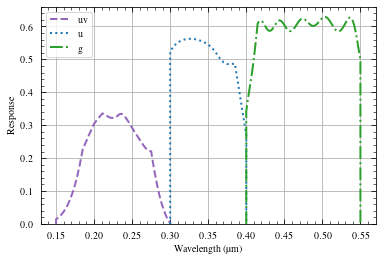

In [3]:
#
# Plot (v1)
#
fig, ax = plt.subplots()
for band in passbands:
    xvals = passbands[band][0]
    yvals = passbands[band][1]
    if band == "uv":
        color = "tab:purple"
        ls = "--"
    elif band == "u":
        color = "tab:blue"
        ls = ":"
    elif band == "g":
        color = "tab:green"
        ls = "-."
    else:
        raise ValueError("Band must be one of 'uv', 'u', or 'g'")
    start_plot, stop_plot = params.PASSBAND_LIMITS[band]
    to_plot = (xvals >= start_plot) & (xvals <= stop_plot)
    ax.plot(
        [start_plot, *xvals[to_plot], stop_plot],
        [0, *yvals[to_plot], 0],
        color=color,
        ls=ls,
        lw=2,
        label=band,
    )
ax.set_ylim(bottom=0)
ax.set_xlabel(r"Wavelength (\textmu m)")
ax.set_ylabel("Response")
ax.legend()
fig.savefig(fp.OUTPATH + "passband_castor.pdf")
plt.show()

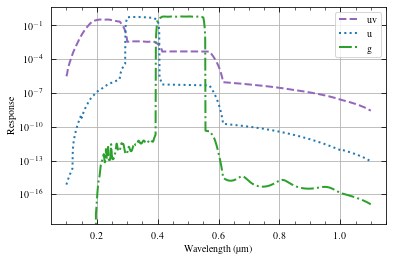

In [3]:
#
# Plot (v2)
#
fig, ax = plt.subplots()
for band in passbands:
    xvals = passbands[band][0]
    yvals = passbands[band][1]
    if band == "uv":
        color = "tab:purple"
        ls = "--"
    elif band == "u":
        color = "tab:blue"
        ls = ":"
    elif band == "g":
        color = "tab:green"
        ls = "-."
    else:
        raise ValueError("Band must be one of 'uv', 'u', or 'g'")
    ax.plot(
        passbands[band][0],
        passbands[band][1],
        color=color,
        ls=ls,
        lw=2,
        label=band,
    )
# ax.set_xlim(0.35, 0.45)
ax.semilogy()
# ax.set_ylim(bottom=0)
ax.set_xlabel(r"Wavelength (\textmu m)")
ax.set_ylabel("Response")
ax.legend()
fig.savefig(fp.OUTPATH + "passband_castor_v2.pdf")
plt.show()
